[INFO] your file extension is: `xlsx`
[INFO] your read function is: `read_excel`
We found plots for 3 columns types:

	1. bool columns type
	2. string columns type
	3. numeric columns type


<Figure size 432x288 with 0 Axes>

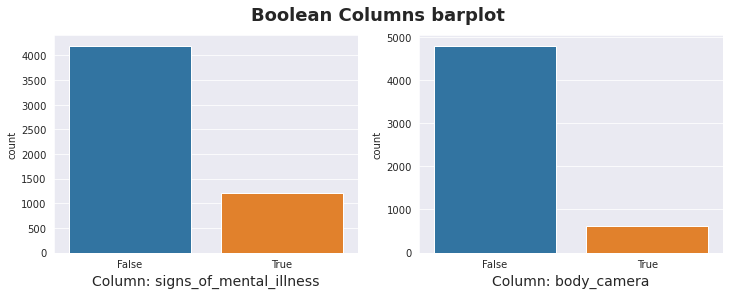

<Figure size 432x288 with 0 Axes>

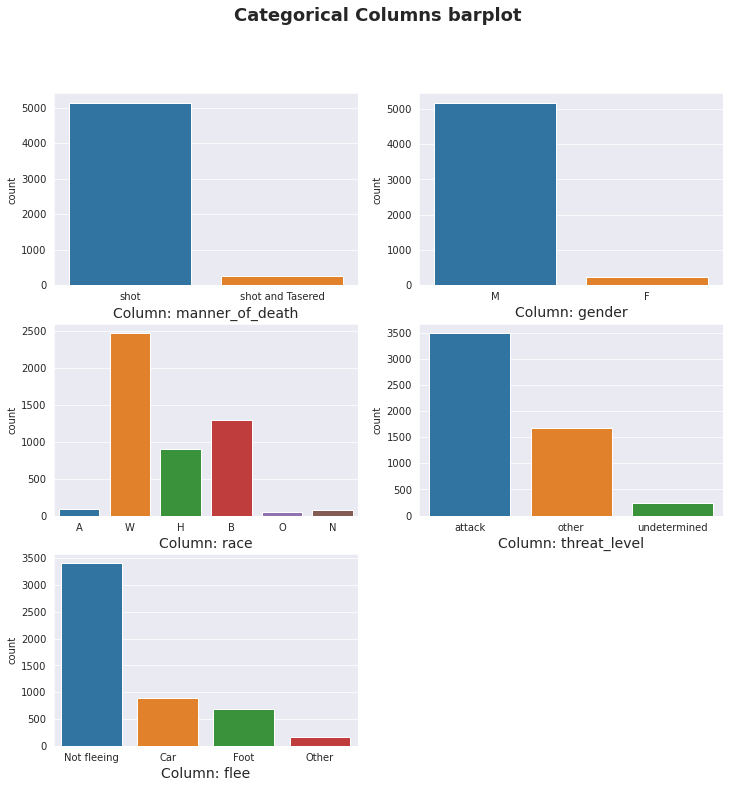

<Figure size 432x288 with 0 Axes>

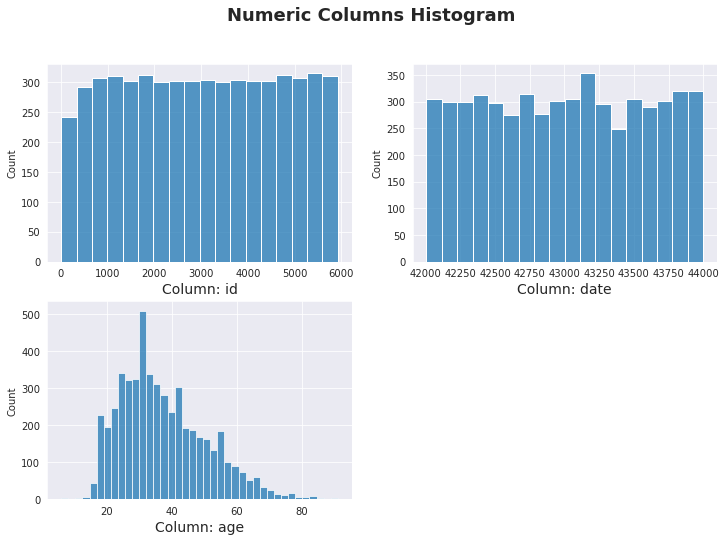

Thank you =) .


In [1]:
# libs for working with data and model
import numpy as np
from scipy import stats
import pandas as pd
import inspect 
import argparse
import math

# libs for visualiations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

user_input_path = '../data/fatal-police-shootings-data.xlsx'
# user_input_path = input("[REQUIRED] Please Enter data file path: ")
dataset_extension = user_input_path.split('.')[-1]

print(f'[INFO] your file extension is: `{dataset_extension}`')

pd_read_methods = [['xlsx', 'xls', 'xlt', 'read_excel'],'read_csv','read_fwf','read_table',['pkl', 'read_pickle'],['hdf', 'hdf5', 'read_hdf'],'read_sql','read_parquet','read_orc','read_feather','read_gbq','read_html','read_xml','read_json','read_stata','read_sas','read_spss']

for ext in pd_read_methods:
    if dataset_extension in ext:
        break

if type(ext) is list:
    ext = ext[-1]

print(f'[INFO] your read function is: `{ext}`')


required_parameters = []
params = inspect.signature(pd.__dict__[ext]).parameters

for param, value in params.items():
    if value.default == inspect._empty:
        required_parameters.append(param)
    else:
        break




params_input = {}
for param in required_parameters:
    params_input[param] = user_input_path

# params_input['sheet_name'] = 'sheet1'

df = pd.__dict__[ext](**params_input)
# df = pd.read_csv('data/dats.csv')
df.columns = df.columns.str.strip().str.lower()

numeric_cols = df.select_dtypes(['float64', 'int64']).columns.tolist()
object_cols = df.select_dtypes('object').columns.tolist()
object_cols = list(filter(
    lambda x: df[x].nunique() <= 50,
    object_cols
))
bool_cols = df.select_dtypes('bool').columns.tolist()


is_bool_empty:bool = bool(bool_cols)
is_object_empty:bool = bool(object_cols)
is_numeric_empty:bool= bool(numeric_cols)

def plotter(list_of_cols: iter, title: str, plot_provider, plotter_name:str, **kwargs):
    length = len(list_of_cols)
    cols = [1, 2][int(length > 1)]
    rows = math.ceil(length/2)

    fig = plt.figure(figsize=(6 * cols, 4 * rows))
    fig.suptitle(title, fontsize=18, fontweight='bold')

    for i, column in enumerate(list_of_cols):
        plt.subplot(rows, cols, i+1)
        plot_provider.__dict__[plotter_name](data=df, x=column, **kwargs)
        plt.xlabel(f"Column: {column}", fontsize=14)

    plt.show()

index = 1
print(f"We found plots for {is_bool_empty + is_numeric_empty + is_object_empty} columns types:\n")

plots = []

if is_bool_empty:
    print(f"\t{index}. bool columns type")
    plots.append((bool_cols, 'Boolean Columns barplot', sns, 'countplot'))
    index += 1

if is_object_empty:
    print(f"\t{index}. string columns type")
    plots.append((object_cols, 'Categorical Columns barplot', sns, 'countplot'))
    index += 1

if is_numeric_empty:
    print(f"\t{index}. numeric columns type")
    plots.append((numeric_cols, 'Numeric Columns Histogram', sns, 'histplot'))


while True:
    user_choosen_plot = input('\n\nChoose plots from above to show, type q or Q to quite.')

    if user_choosen_plot.lower() == 'q':
        print('Thank you =) .')
        break

    try:
        user_choosen_plot = int(user_choosen_plot) - 1
        plt.clf()
        _ = plotter(*plots[user_choosen_plot])
        plt.show()

    except:
        print('Choosen number must be an integer number and from list above.')
